##**1. Import Library**

In [ ]:
# upgrade matplotlib version
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 944 kB 41.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# import library/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##**2. Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/ds_salaries.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


##**3. Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

##**4. Data Preprocessing**

###**a) Data Cleansing**

In [ ]:
# total missing value
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# percentage of missing value
df.isnull().sum() * 100/ len(df)

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

###**b) Rename/Replace Values in Column** 

In [ ]:
df['remote_ratio'].replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

##**5. Statistical Summary/Descriptive**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0


<AxesSubplot:>

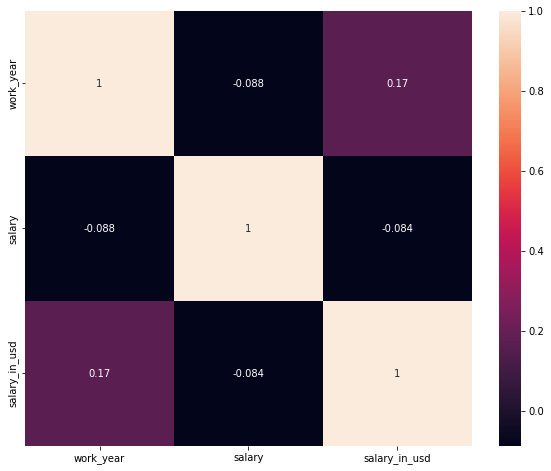

In [ ]:
# display correlation with heatmap
corr_ = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True)

##**6. Exploratory Data Analysis (EDA)**

###**a) Univariat Analysis**

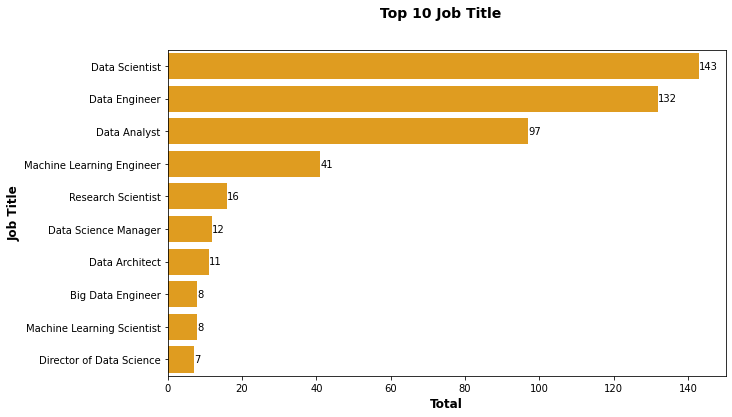

In [ ]:
jobtitle_count = df.groupby(['job_title'],as_index=False).size()
jobtitle_count = jobtitle_count.sort_values(['size'],ascending=False).head(10)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=jobtitle_count['size'],
            y=jobtitle_count['job_title'], color='orange')
ax.set_xlabel('Total', fontsize= 12, weight= 'bold')
ax.set_ylabel('Job Title', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' Top 10 Job Title', fontsize= 14, weight= 'bold')
plt.show()

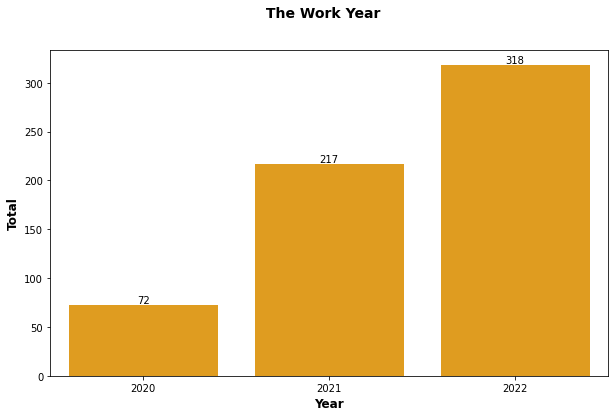

In [ ]:
workyear_count = df.groupby(['work_year'],as_index=False).size()
workyear_count = workyear_count.sort_values(['size'],ascending=False)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=workyear_count['work_year'],
            y=workyear_count['size'], color='orange')
ax.set_xlabel('Year', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' The Work Year', fontsize= 14, weight= 'bold')
plt.show()

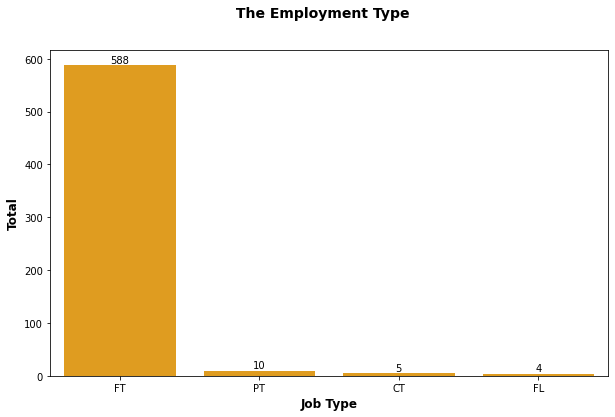

In [ ]:
emp_type_count = df.groupby(['employment_type'],as_index=False).size()
emp_type_count = emp_type_count.sort_values(['size'],ascending=False)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=emp_type_count['employment_type'],
            y=emp_type_count['size'], color='orange')
ax.set_xlabel('Job Type', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' The Employment Type', fontsize= 14, weight= 'bold')
plt.show()

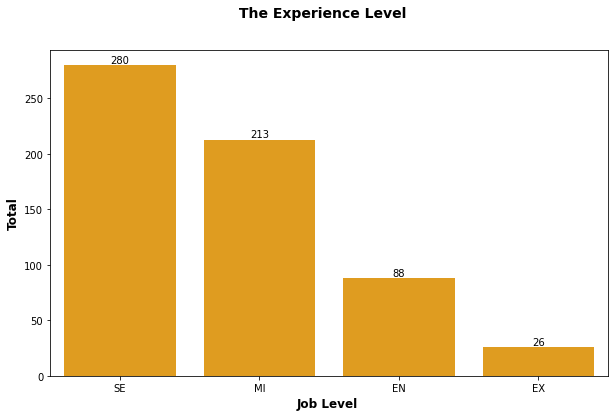

In [ ]:
exp_level_count = df.groupby(['experience_level'],as_index=False).size()
exp_level_count = exp_level_count.sort_values(['size'],ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x=exp_level_count['experience_level'],
            y=exp_level_count['size'], color='orange')
ax.set_xlabel('Job Level ', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' The Experience Level', fontsize= 14, weight= 'bold')
plt.show()

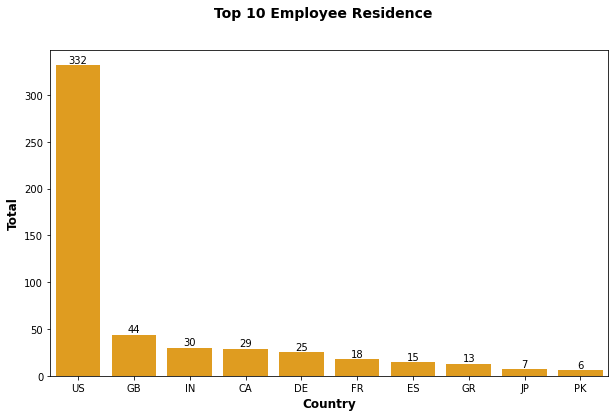

In [ ]:
emp_res_count = df.groupby(['employee_residence'],as_index=False).size()
emp_res_count = emp_res_count.sort_values(['size'],ascending=False).head(10)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=emp_res_count['employee_residence'],
            y=emp_res_count['size'], color='orange')
ax.set_xlabel('Country', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' Top 10 Employee Residence', fontsize= 14, weight= 'bold')
plt.show()

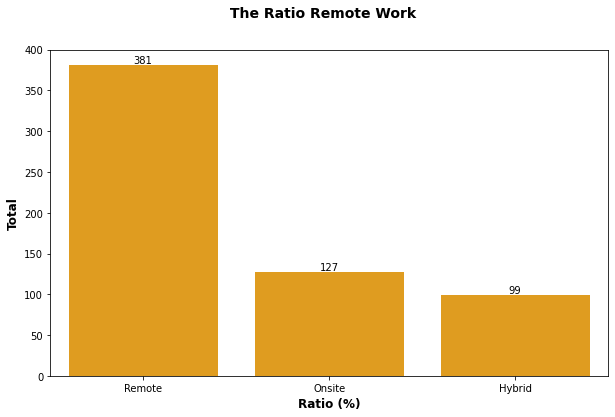

In [ ]:
rem_rat_count = df.groupby(['remote_ratio'],as_index=False).size()
rem_rat_count = rem_rat_count.sort_values(['size'],ascending=False)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=rem_rat_count['remote_ratio'],
            y=rem_rat_count['size'], color='orange')
ax.set_xlabel('Ratio (%)', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' The Ratio Remote Work', fontsize= 14, weight= 'bold')
plt.show()

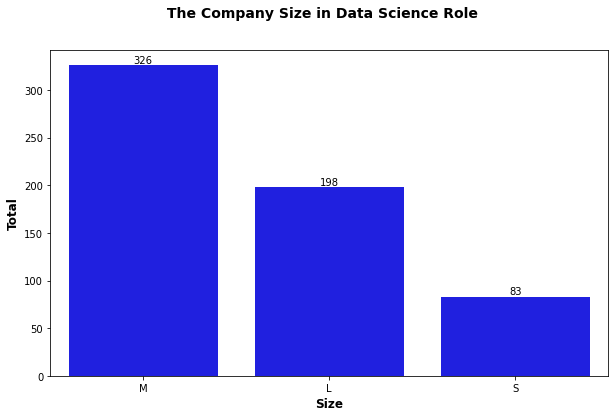

In [ ]:
comp_size = df.groupby(['company_size'],as_index=False).size()
comp_size = comp_size.sort_values(['size'],ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x=comp_size['company_size'],
            y=comp_size['size'], color='blue')
ax.set_xlabel('Size', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' The Company Size in Data Science Role', fontsize= 14, weight= 'bold')
plt.show()

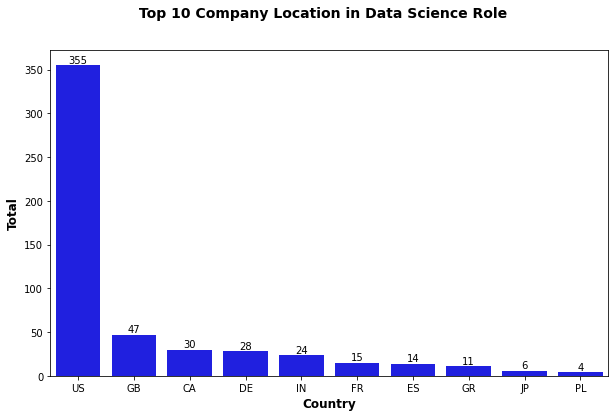

In [ ]:
comp_loc = df.groupby(['company_location'],as_index=False).size()
comp_loc = comp_loc.sort_values(['size'],ascending=False).head(10)
plt.figure(figsize=(10,6))
ax= sns.barplot(x=comp_loc['company_location'],
            y=comp_loc['size'], color='blue')
ax.set_xlabel('Country', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' Top 10 Company Location in Data Science Role', fontsize= 14, weight= 'bold')
plt.show()

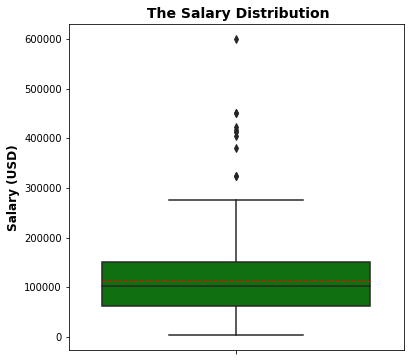

In [ ]:
plt.figure(figsize=(6,6))
ax= sns.boxplot(data= df, y='salary_in_usd', color='green',
                showmeans=True, meanline=True,meanprops={'color':'red'})
ax.set_ylabel('Salary (USD)', fontsize=12, weight='bold')
plt.title(' The Salary Distribution', fontsize= 14, weight= 'bold')
plt.show()

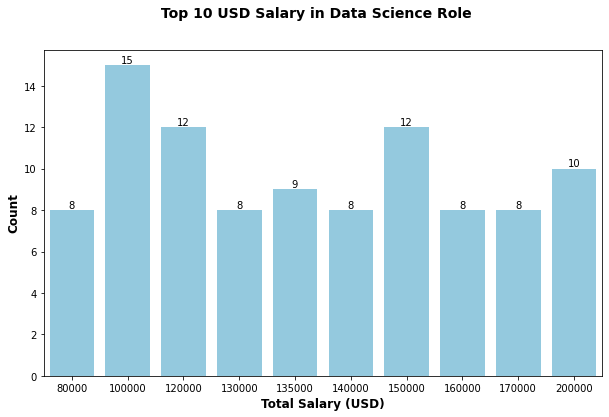

In [ ]:
usd_count = df.groupby(['salary_in_usd'],as_index=False).size()
usd_count = usd_count.sort_values(['size'], ascending=False).head(10)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=usd_count['salary_in_usd'],
            y=usd_count['size'], color='skyblue')
ax.set_xlabel('Total Salary (USD)', fontsize= 12, weight= 'bold')
ax.set_ylabel('Count', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' Top 10 USD Salary in Data Science Role', fontsize= 14, weight= 'bold')
plt.show()

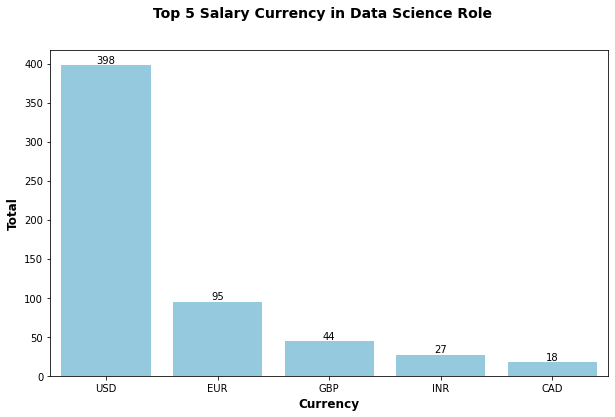

In [ ]:
salary_count = df.groupby(['salary_currency'],as_index=False).size()
salary_count = salary_count.sort_values(['size'], ascending=False).head(5)

plt.figure(figsize=(10,6))
ax= sns.barplot(x=salary_count['salary_currency'],
            y=salary_count['size'], color='skyblue')

ax.set_xlabel('Currency', fontsize= 12, weight= 'bold')
ax.set_ylabel('Total', fontsize= 12, weight= 'bold')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.f')
plt.suptitle(' Top 5 Salary Currency in Data Science Role', fontsize= 14, weight= 'bold')
plt.show()

###**b) Multivariat Analysis**

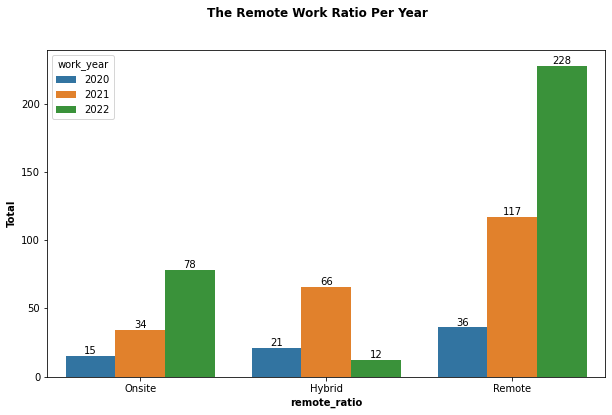

In [ ]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df,x='remote_ratio',hue='work_year')
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f')
plt.suptitle('The Remote Work Ratio Per Year', weight= 'bold')
ax.set_ylabel('Total', weight='bold')
ax.set_xlabel('remote_ratio', weight='bold')
plt.show()


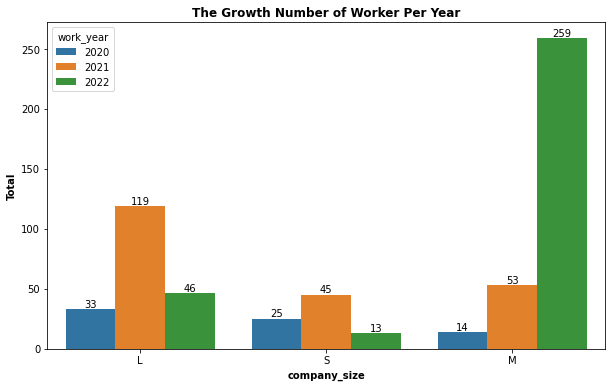

In [ ]:
plt.figure(figsize=(10,6))
ax= sns.countplot(data=df,x='company_size',hue='work_year')
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.f')
plt.title('The Growth Number of Worker Per Year', weight= 'bold')
ax.set_ylabel('Total', weight='bold')
ax.set_xlabel('company_size', weight='bold')
plt.show()


In [ ]:
work_year_salary = df.groupby(['work_year']).agg({'salary_in_usd':[('mean_salary', 'mean')]})
work_year_salary.columns = work_year_salary.columns.droplevel()
work_year_salary.reset_index(inplace=True)
work_year_salary

,work_year,mean_salary
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


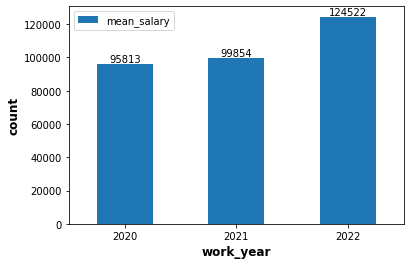

In [ ]:
wr= work_year_salary.plot.bar(x='work_year', y='mean_salary')

for bars in wr.containers:
    wr.bar_label(bars, fmt='%.f')
wr.set_xlabel('work_year', weight='bold', fontsize= 12)
wr.set_ylabel('count', weight='bold', fontsize= 12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
salary_job_type = df.groupby(['job_title', 'experience_level']).agg(
                    {'salary_in_usd':[('mean_salary','mean')]}).round(0)
salary_job_type.columns = salary_job_type.columns.droplevel()
salary_job_type = salary_job_type.sort_values('mean_salary', ascending=False).head(10)
salary_job_type.reset_index(inplace=True)
salary_job_type 


,job_title,experience_level,mean_salary
0,Principal Data Engineer,EX,600000.0
1,Financial Data Analyst,MI,450000.0
2,Principal Data Scientist,EX,416000.0
3,Data Analytics Lead,SE,405000.0
4,Applied Data Scientist,SE,278500.0
5,ML Engineer,SE,256000.0
6,Data Engineer,EX,245500.0
7,Head of Data,EX,232500.0
8,Machine Learning Scientist,EN,225000.0
9,Machine Learning Scientist,SE,201667.0


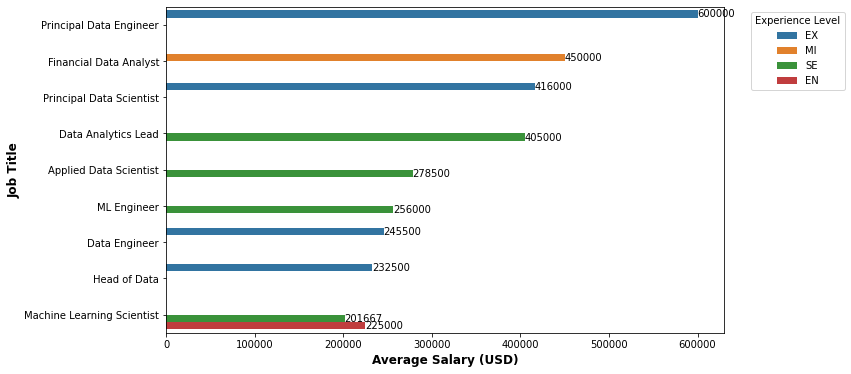

In [ ]:
plt.figure(figsize=(10,6))
sjt = sns.barplot(data= salary_job_type, y='job_title', x= 'mean_salary', hue= 'experience_level')
for bars in sjt.containers:
    sjt.bar_label(bars, fmt='%.f')
sjt.set_xlabel('Average Salary (USD)', weight='bold', fontsize= 12)
sjt.set_ylabel('Job Title', weight='bold', fontsize= 12)
sjt.legend(title='Experience Level', bbox_to_anchor=(1.04,1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

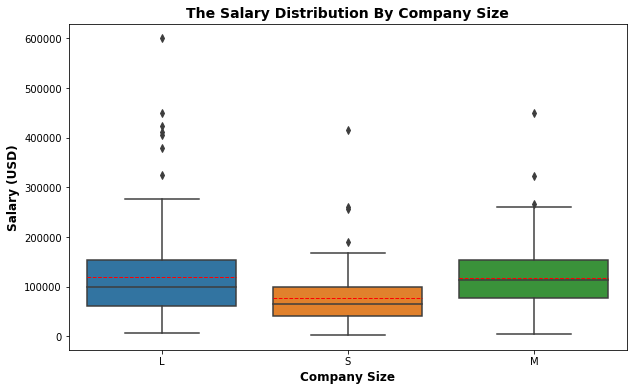

,company_size,mean_salary,median_salary,min_salary,max_salary
0,L,119243.0,100000.0,5882,600000
1,M,116905.0,113188.0,4000,450000
2,S,77633.0,65000.0,2859,416000


In [ ]:
plt.figure(figsize=(10,6))
cs = sns.boxplot(data= df, x='company_size', y='salary_in_usd', showmeans=True, 
                 meanline=True, meanprops={'color':'red'})
cs.set_xlabel('Company Size', fontsize=12, weight='bold')
cs.set_ylabel('Salary (USD)', fontsize=12, weight='bold')
plt.title('The Salary Distribution By Company Size',fontsize=14, weight='bold')
plt.show()

company_size_salary =df.groupby(['company_size']).agg(
                        mean_salary= ('salary_in_usd', 'mean'),
                        median_salary=('salary_in_usd', 'median'),
                        min_salary= ('salary_in_usd', 'min'),
                        max_salary= ('salary_in_usd', 'max')).round(0).reset_index()
company_size_salary = company_size_salary.sort_values('mean_salary', ascending=False).head(10)
company_size_salary


In [ ]:
company_location_salary =df.groupby(['company_location']).agg(
                        mean_salary= ('salary_in_usd', 'mean')).round(0).reset_index()
company_location_salary = company_location_salary.sort_values('mean_salary', ascending=False).head(10)
company_location_salary

,company_location,mean_salary
43,RU,157500.0
48,US,144055.0
38,NZ,125000.0
24,IL,119059.0
29,JP,114127.0
3,AU,108043.0
0,AE,100000.0
14,DZ,100000.0
26,IQ,100000.0
6,CA,99824.0


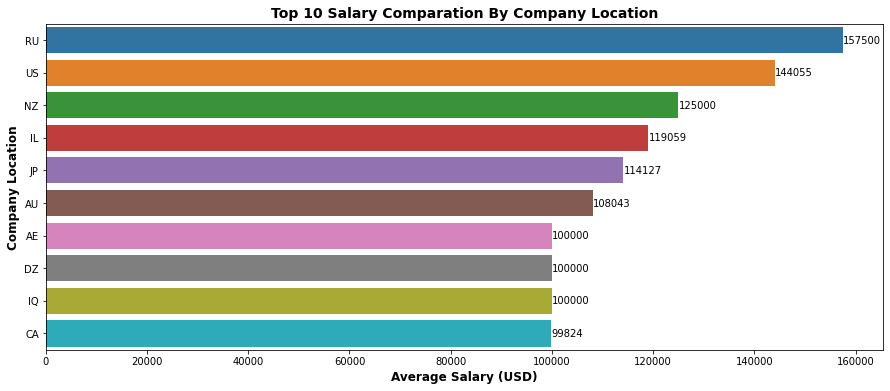

In [ ]:
plt.figure(figsize=(15,6))
cl = sns.barplot(data= company_location_salary, x='mean_salary', y='company_location')
cl.set_xlabel('Average Salary (USD)', fontsize=12, weight='bold')
cl.set_ylabel('Company Location', fontsize=12, weight='bold')
for bars in cl.containers:
    cl.bar_label(bars, fmt='%.f')
plt.title('Top 10 Salary Comparation By Company Location',fontsize=14, weight='bold')
plt.show()

In [ ]:
employee_residence_salary =df.groupby(['employee_residence']).agg(
                        mean_salary= ('salary_in_usd', 'mean')).round(0).reset_index()
employee_residence_salary = employee_residence_salary.sort_values('mean_salary', ascending=False).head(10)
employee_residence_salary

,employee_residence,mean_salary
38,MY,200000.0
45,PR,160000.0
55,US,149194.0
41,NZ,125000.0
9,CH,122346.0
3,AU,108043.0
49,RU,105750.0
50,SG,104176.0
32,JP,103538.0
0,AE,100000.0


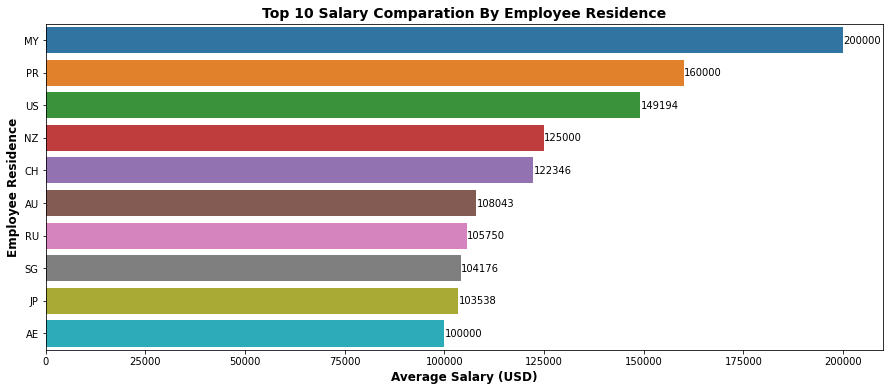

In [ ]:
plt.figure(figsize=(15,6))
er = sns.barplot(data= employee_residence_salary, x='mean_salary', y='employee_residence')
er.set_xlabel('Average Salary (USD)', fontsize=12, weight='bold')
er.set_ylabel('Employee Residence', fontsize=12, weight='bold')
for bars in er.containers:
    er.bar_label(bars, fmt='%.f')
plt.title('Top 10 Salary Comparation By Employee Residence',fontsize=14, weight='bold')
plt.show()

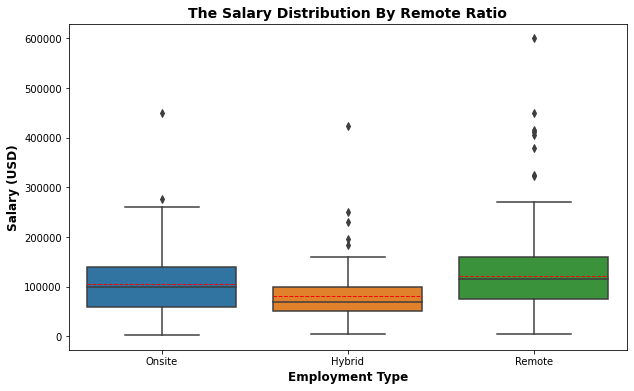

,remote_ratio,mean_salary,median_salary,min_salary,max_salary
2,Remote,122457.0,115000.0,4000,600000
1,Onsite,106355.0,99000.0,2859,450000
0,Hybrid,80823.0,69999.0,5409,423000


In [ ]:
plt.figure(figsize=(10,6))
cs = sns.boxplot(data= df, x='remote_ratio', y='salary_in_usd', showmeans=True, 
                 meanline=True, meanprops={'color':'red'})
cs.set_xlabel('Employment Type', fontsize=12, weight='bold')
cs.set_ylabel('Salary (USD)', fontsize=12, weight='bold')
plt.title('The Salary Distribution By Remote Ratio',fontsize=14, weight='bold')
plt.show()

employment_type_salary =df.groupby(['remote_ratio']).agg(
                        mean_salary= ('salary_in_usd', 'mean'),
                        median_salary=('salary_in_usd', 'median'),
                        min_salary= ('salary_in_usd', 'min'),
                        max_salary= ('salary_in_usd', 'max')).round(0).reset_index()
employment_type_salary = employment_type_salary.sort_values('mean_salary', ascending=False).head(10)
employment_type_salary 

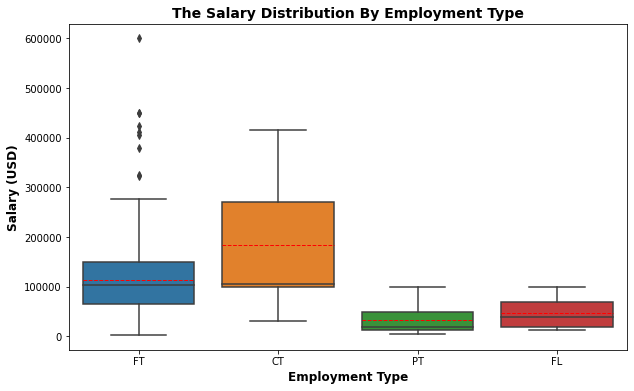

,employment_type,mean_salary,median_salary,min_salary,max_salary
0,CT,184575.0,105000.0,31875,416000
2,FT,113468.0,104196.0,2859,600000
1,FL,48000.0,40000.0,12000,100000
3,PT,33070.0,18818.0,5409,100000


In [ ]:
plt.figure(figsize=(10,6))
cs = sns.boxplot(data= df, x='employment_type', y='salary_in_usd', showmeans=True, 
                 meanline=True, meanprops={'color':'red'})
cs.set_xlabel('Employment Type', fontsize=12, weight='bold')
cs.set_ylabel('Salary (USD)', fontsize=12, weight='bold')
plt.title('The Salary Distribution By Employment Type',fontsize=14, weight='bold')
plt.show()

employment_type_salary =df.groupby(['employment_type']).agg(
                        mean_salary= ('salary_in_usd', 'mean'),
                        median_salary=('salary_in_usd', 'median'),
                        min_salary= ('salary_in_usd', 'min'),
                        max_salary= ('salary_in_usd', 'max')).round(0).reset_index()
employment_type_salary = employment_type_salary.sort_values('mean_salary', ascending=False).head(10)
employment_type_salary 

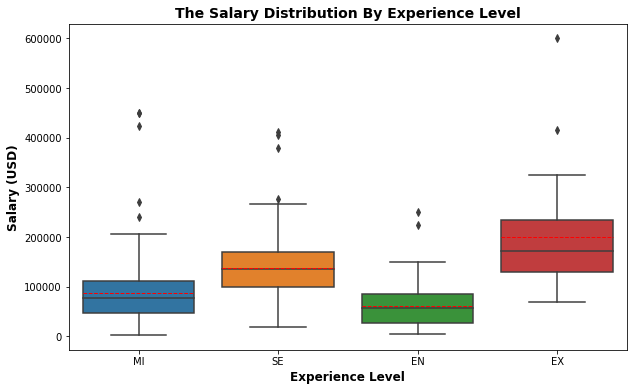

,experience_level,mean_salary,median_salary,min_salary,max_salary
1,EX,199392.0,171438.0,69741,600000
3,SE,138617.0,135500.0,18907,412000
2,MI,87996.0,76940.0,2859,450000
0,EN,61643.0,56500.0,4000,250000


In [ ]:
plt.figure(figsize=(10,6))
cs = sns.boxplot(data= df, x='experience_level', y='salary_in_usd', showmeans=True, 
                 meanline=True, meanprops={'color':'red'})
cs.set_xlabel('Experience Level', fontsize=12, weight='bold')
cs.set_ylabel('Salary (USD)', fontsize=12, weight='bold')
plt.title('The Salary Distribution By Experience Level',fontsize=14, weight='bold')
plt.show()

experience_level_salary =df.groupby(['experience_level']).agg(
                        mean_salary= ('salary_in_usd', 'mean'),
                        median_salary=('salary_in_usd', 'median'),
                        min_salary= ('salary_in_usd', 'min'),
                        max_salary= ('salary_in_usd', 'max')).round(0).reset_index()
experience_level_salary = experience_level_salary.sort_values('mean_salary', ascending=False).head(10)
experience_level_salary 